# **Dataset**

**Title:** Super Store Dataset

**Link:** https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/

**Description: ** The Superstore Dataset from Kaggle is a comprehensive collection of sales data from a fictional retail company, encompassing transactions between January 3, 2014, and January 5, 2018. This dataset is widely utilized for exploratory data analysis (EDA), data visualization, and predictive modeling exercises.



**Overview:**

Total Records: 9,994 rows

Total Columns: 21 features

Time Frame: 2014–2018

Geographical Scope: United States



**Analytical Application**

*Sales Trend Analysis:* Identifying patterns over time

*Customer Segmentation:* Classifying customers based on purchasing behavior

*Profitability Analysis:* Determining which products or regions yield the highest profits

*Market Basket Analysis:* Exploring product bundling opportunities

*Predictive Modeling:* Forecasting sales and profits

# Import Libraries


In [20]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Load and check data



In [21]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/colab/superstore.csv', index_col = 'Row ID', encoding='cp1252')

data.head(5)
data.info()


# check for number of unique values in every column
for column in data.columns:
  print("Column Name:", column+";", "Number of Unique Values:", len(data[column].unique()))


# drop unnecessary columns
data = data.drop(columns=["Country", "Customer Name"])


# drop duplicated data
data = data.drop_duplicates()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9

# Setup

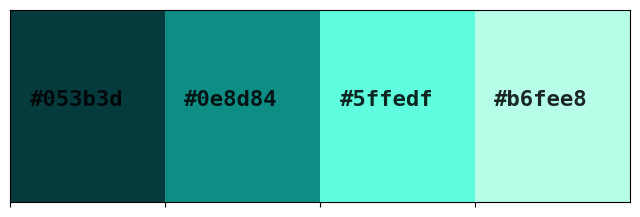

In [22]:
# Creating color pallete for visualization
colors = ['#053b3d','#0e8d84', '#5ffedf', '#b6fee8']

sns.palplot(colors)
plt.gcf().set_size_inches(8,2.5)

for idx,values in enumerate(colors):
    plt.text(idx-0.375,0, colors[idx],{'font': "DejaVu Sans Mono", 'size':16, 'weight':'bold','color':'black'}, alpha =0.85)
plt.gcf().set_facecolor('white')

plt.show()

In [23]:
# Abbreviation of states
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# States

In [24]:
# Number of Customers by State Map

# Create new column with State Abbreviations
data['State_abb'] = data['State'].replace(us_state_to_abbrev)

# Plot
fig = go.Figure(data=go.Choropleth(
    locations= data['State_abb'].value_counts().index, # Spatial coordinates
    z = data['State_abb'].value_counts(), # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 1000
))

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Customers by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [25]:
# Frequency of Orders by Region
fig = px.bar(x = data['Region'].value_counts().index, y = data['Region'].value_counts(),
             color = data['Region'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

# Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Region",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Shipping Mode

In [26]:
fig = px.bar(x = data['Ship Mode'].value_counts().index, y = data['Ship Mode'].value_counts(),
             color = data['Ship Mode'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Shipping Modes",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Category and Sub-Category

In [27]:
# Category
fig = px.bar(x = data['Category'].value_counts().index, y = data['Category'].value_counts(),
             color = data['Category'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

# Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

In [28]:
# Sub-Category
fig = px.bar(x = data['Sub-Category'].value_counts().index, y = data['Sub-Category'].value_counts(),
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Sales Analysis

*Total sales by states map*

In [29]:
# Total sells by states map
# Make a copy of original table
copy = data.copy()

# Group by State_abb and aggrigate sum function on Sales and Profit columns
data_sum_by_states = copy[['State_abb', 'Sales', 'Profit']].groupby('State_abb').sum()

# Reset index
data_sum_by_states.reset_index(inplace=True)

# Plotr
fig = go.Figure(data=go.Choropleth(
    locations= data_sum_by_states['State_abb'], # Spatial coordinates
    z = data_sum_by_states['Sales'], # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal',
))

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show()

*Total sales by category*

In [30]:
# group by category
sales_per_category = data[['Category', 'Sales']].groupby('Category').sum()

# sort values by Sales
sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_category['cumperc'] = sales_per_category.cumsum()/sales_per_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_category.index,
           y = sales_per_category['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_category.index,
               y = sales_per_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

*Total sales by sub-category*

In [31]:
# group by sub-category
sales_per_sub_category = data[['Sub-Category', 'Sales']].groupby('Sub-Category').sum()

# sort values by Sales
sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_sub_category['cumperc'] = sales_per_sub_category.cumsum()/sales_per_sub_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_sub_category.index,
           y = sales_per_sub_category['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_sub_category.index,
               y = sales_per_sub_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Sub-Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

*Median sales by category*

In [32]:
# group by category
median_sales_per_category = data[['Category', 'Sales']].groupby('Category').median()

# sort values by Sales
median_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_category.index,
             y = median_sales_per_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Sales by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

*Median sales by sub-category*

In [33]:
# group by sub-category
median_sales_per_sub_category = data[['Sub-Category', 'Sales']].groupby('Sub-Category').median()

# sort values by Sales
median_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_sub_category.index,
             y = median_sales_per_sub_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Sales by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

*Mean sales by category*

In [34]:
# group by category
mean_sales_per_category = data[['Category', 'Sales']].groupby('Category').mean()

# sort values by Sales
mean_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_category.index,
             y = mean_sales_per_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Sales by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

*Mean sales by sub-category*

In [35]:
# group by category
mean_sales_per_sub_category = data[['Sub-Category', 'Sales']].groupby('Sub-Category').mean()

# sort values by Sales
mean_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_sub_category.index,
             y = mean_sales_per_sub_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Sales by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

*Sales by category box plot*

In [36]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Category'],
           y = data['Sales'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Sales by Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

*Sales by sub-category box plot*

In [37]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Sub-Category'],
           y = data['Sales'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Sales by Sub-Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

# Profit Analysis

**Total Profit by category**

In [38]:
# group by category
profit_per_category = data[['Category', 'Profit']].groupby('Category').sum()

# sort values by Sales
profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = profit_per_category.index,
             y = profit_per_category['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Profit by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Total Profit by sub-category**

In [39]:
# group by category
profit_per_sub_category = data[['Sub-Category', 'Profit']].groupby('Sub-Category').sum()

# sort values by Sales
profit_per_sub_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# customize colors
new_colors = [colors[0],] * 17
new_colors[14] = '#FF69B4'
new_colors[15] = '#FF69B4'
new_colors[16] = '#FF69B4'

# bar chart
fig = px.bar(x = profit_per_sub_category.index,
             y = profit_per_sub_category['Profit'],
             color = profit_per_sub_category.index,
             template = 'simple_white', color_discrete_sequence = new_colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Profit by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Median Profit by category**

In [40]:
# group by category
median_profit_per_category = data[['Category', 'Profit']].groupby('Category').median()

# sort values by Sales
median_profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_profit_per_category.index,
             y = median_profit_per_category['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Profit by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Median Profit by sub-category**

In [41]:
# group by category
median_profit_per_sub_category = data[['Sub-Category', 'Profit']].groupby('Sub-Category').median()

# sort values by Sales
median_profit_per_sub_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# customize colors
new_colors = [colors[1],] * 17
new_colors[16] = '#FF69B4'

# bar chart
fig = px.bar(x = median_profit_per_sub_category.index,
             y = median_profit_per_sub_category['Profit'],
             color = median_profit_per_sub_category.index,
             template = 'simple_white', color_discrete_sequence = new_colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Profit by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

****Mean Profit by category****

In [42]:
# group by category
mean_profit_per_category = data[['Category', 'Profit']].groupby('Category').mean()

# sort values by Sales
mean_profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_profit_per_category.index,
             y = mean_profit_per_category['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Profit by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Mean Profit by sub-category**

In [43]:
# group by category
mean_profit_per_sub_category = data[['Sub-Category', 'Profit']].groupby('Sub-Category').mean()

# sort values by Sales
mean_profit_per_sub_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# customize colors
new_colors = [colors[2],] * 17
new_colors[15] = '#FF69B4'
new_colors[14] = '#FF69B4'
new_colors[16] = '#FF69B4'

# bar chart
fig = px.bar(x = mean_profit_per_sub_category.index,
             y = mean_profit_per_sub_category['Profit'],
             color = mean_profit_per_sub_category.index,
             template = 'simple_white', color_discrete_sequence = new_colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Profit by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Profit by category boxplot**

In [44]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Category'],
           y = data['Profit'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit by Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

**Profit by sub-category boxplot**

In [45]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Sub-Category'],
           y = data['Profit'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit by Sub-Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

# Sale Quantity Analysis

**Total Quantity by category**

In [46]:
# group by category
quantity_per_category = data[['Category', 'Quantity']].groupby('Category').sum()

# sort values by Sales
quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
quantity_per_category['cumperc'] = quantity_per_category.cumsum()/quantity_per_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = quantity_per_category.index,
           y = quantity_per_category['Quantity'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = quantity_per_category.index,
               y = quantity_per_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Product Sold by Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Quantity", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

**Total Quantity by sub-category**

In [47]:
# group by sub-category
quantity_per_sub_category = data[['Sub-Category', 'Quantity']].groupby('Sub-Category').sum()

# sort values by Sales
quantity_per_sub_category.sort_values(by='Quantity', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
quantity_per_sub_category['cumperc'] = quantity_per_sub_category.cumsum()/quantity_per_sub_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = quantity_per_sub_category.index,
           y = quantity_per_sub_category['Quantity'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = quantity_per_sub_category.index,
               y = quantity_per_sub_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Product Sold by Sub-Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Quantity", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

**Median Quantity by category**

In [48]:
# group by category
median_quantity_per_category = data[['Category', 'Quantity']].groupby('Category').median()

# sort values by Sales
median_quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_quantity_per_category.index,
             y = median_quantity_per_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Number of Product Sold by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Median Quantity by sub-category**

In [49]:
# group by category
median_quantity_per_sub_category = data[['Sub-Category', 'Quantity']].groupby('Sub-Category').median()

# sort values by Sales
median_quantity_per_sub_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_quantity_per_sub_category.index,
             y = median_quantity_per_sub_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Number of Product Sold by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Mean Quantity by category**

In [50]:
# group by category
mean_quantity_per_category = data[['Category', 'Quantity']].groupby('Category').mean()

# sort values by Sales
mean_quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_quantity_per_category.index,
             y = mean_quantity_per_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Number of Product Sold by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Mean Quantity by sub-category**

In [51]:
# group by category
mean_quantity_per_sub_category = data[['Sub-Category', 'Quantity']].groupby('Sub-Category').mean()

# sort values by Sales
mean_quantity_per_sub_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_quantity_per_sub_category.index,
             y = mean_quantity_per_sub_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Number of Product Sold by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Quantity by category in boplot**

In [52]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Category'],
           y = data['Quantity'],
           notched = False,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Quantity by Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

**Quantity by sub-category in boplot**

In [53]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Sub-Category'],
           y = data['Quantity'],
           notched = False,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Quantity by Sub-Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

# Quantity-Profit Correlation

**Scatter plot**

In [54]:
fig = px.scatter(x = data['Quantity'],
                 y = data['Profit'],
                 trendline = 'ols',
                 template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Quantity",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Quantity & Profit Scatter Plot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

**box plot**

In [55]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Quantity'],
           y = data['Profit'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Quantity",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Quantity & Profit Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

# Profit Margin

**Histogram**

In [56]:
# Create Profit Margin column
data['Profit Margin'] = data['Profit'] / data['Sales'] * 100

# plot
fig = px.histogram(data['Profit Margin'],
                   nbins=40,
                   template = 'simple_white',
                   color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit Margin Histogram",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )


fig.show()

**Profit Margin by category and sub-category**

In [57]:
# group by category and subcategory
margin_per_subcategory = data.groupby(['Category', 'Sub-Category'], as_index=False)[['Sales', 'Profit']].sum()
margin_per_subcategory['Profit Margin'] = margin_per_subcategory['Profit'] / margin_per_subcategory['Sales'] * 100

# sort values by Sales
margin_per_subcategory.sort_values(by='Profit Margin', inplace = True)


## PLOT
# bar chart
fig = px.bar(x = margin_per_subcategory['Profit Margin'],
             y = margin_per_subcategory['Sub-Category'],
             color = margin_per_subcategory['Category'],
             orientation = 'h',
             template = 'simple_white',
             color_discrete_sequence = np.flip(colors))

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Sub-Category",
    legend_title="Category",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit Margin by Category & Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Worst Products from each Category by Profit Margin**

In [58]:
# group by category and subcategory
margin_per_product = data.groupby(['Category', 'Product Name'], as_index=False)[['Sales', 'Profit']].sum()
margin_per_product['Profit Margin'] = margin_per_product['Profit'] / margin_per_product['Sales'] * 100

# sort values by Sales
margin_per_product.sort_values(by='Profit Margin', ascending = True, inplace = True)


## PLOT
fig = make_subplots(rows=1, cols=3)

# bar chart
fig.add_trace(
    go.Bar(x = margin_per_product.loc[margin_per_product['Category'] == 'Furniture']['Profit Margin'][:15],
           y = margin_per_product.loc[margin_per_product['Category'] == 'Furniture']['Product Name'][:15],
           orientation = 'h',
           name = 'Furniture',
           marker_color = colors[0],
                    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x = margin_per_product.loc[margin_per_product['Category'] == 'Technology']['Profit Margin'][:15],
           y = margin_per_product.loc[margin_per_product['Category'] == 'Technology']['Product Name'][:15],
           orientation = 'h',
           name = 'Technology',
           marker_color = colors[1],
           yaxis="y2",
           xaxis="x2"
                    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = margin_per_product.loc[margin_per_product['Category'] == 'Office Supplies']['Profit Margin'][:15],
           y = margin_per_product.loc[margin_per_product['Category'] == 'Office Supplies']['Product Name'][:15],
           orientation = 'h',
           name = 'Office Supplies',
           marker_color = colors[2],
           yaxis="y3",
           xaxis="x3"
                    ),
    row=1, col=3
)

# Fix axes:

fig.update_layout(
    yaxis=dict(
        visible = False
    ),
    xaxis=dict(
        title = "Profit Margin (%)"
    ),
    yaxis2=dict(
        visible = False
    ),
     xaxis2=dict(
        title = "Profit Margin (%)"
    ),
    yaxis3=dict(
        visible = False
    ),
    xaxis3=dict(
        title = "Profit Margin (%)"
    )
)


#Set Title and x/y axis labels
fig.update_layout(

    legend_title="Category",
    showlegend = True,
    font = dict(
            size = 12
            ),
    title={
        'text': "Top 15 Worst Products from each Category by Profit Margin<br>(Hover over the singe bar to see the product name)",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

# Customer Analysis

**Total Sales**

In [59]:
# group by segment
sales_per_segment = data[['Segment', 'Sales']].groupby('Segment').sum()

# sort values by Sales
sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_segment['cumperc'] = sales_per_segment.cumsum()/sales_per_segment.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_segment.index,
           y = sales_per_segment['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_segment.index,
               y = sales_per_segment['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Segment",
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Segment Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

**Total Profit**

In [60]:
# group by segment
profit_per_segment = data[['Segment', 'Profit']].groupby('Segment').sum()

# sort values by Sales
profit_per_segment.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = profit_per_segment.index,
             y = profit_per_segment['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Profit by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Total Quantity**

In [61]:
# group by category
quantity_per_segment = data[['Segment', 'Quantity']].groupby('Segment').sum()

# sort values by Sales
quantity_per_segment.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = quantity_per_segment.index,
             y = quantity_per_segment['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Number of Product Sold by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

**Regular Customer**

In [62]:
# let's say customer is regular if they have 10 or more orders:

regular_customers = data.groupby('Customer ID', as_index = False)['Order ID'].count()

# it's not the best method to do this, but I now exact max value is 37, so i can replace "manualy"
regular_customers = regular_customers.replace(range(1, 10), 1)
regular_customers = regular_customers.replace(range(10, 38), 2)

# goupby one more table with sum profit and sales for future join
customers_sales_profit = data[['Sales', 'Profit', 'Customer ID']].groupby('Customer ID', as_index = False).sum()

# now join sales and profit values
regular_customers_merged = pd.merge(left = regular_customers, right = customers_sales_profit, how = 'left', on = 'Customer ID')

# drop customer id column
regular_customers_merged.drop(columns = 'Customer ID', inplace = True)

# rename Order ID column to Customer and replace values 1 and 2 to Not Regular and Regular
regular_customers_merged.rename(columns = {'Order ID': 'Customer'}, inplace = True)
regular_customers_merged['Customer'] = regular_customers_merged['Customer'].replace({1:'Not Regular', 2: 'Regular'})

#groupby Customer column:
regular_customers = regular_customers_merged.groupby('Customer', as_index = False).sum()

regular_customers_merged
## PLOT

fig = go.Figure(go.Pie(labels = regular_customers['Customer'],
                 values = regular_customers['Sales'],
                 )
        )
fig.update_traces(
    marker=dict(
            colors=colors,
            line=dict(
                    color='#000000',
                    width=1
            )
    ),
    pull=[0.1, 0]
)

#Set Title and x/y axis labels
fig.update_layout(
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Number of Sales by Customer Type<br>(Regular/Not Rugular)",
        'y':0.9,
        'x':0.1
        },
    template = 'simple_white',
    )

fig.show()

# Discount Analysis

**Sales with/without discount**

In [63]:
orders_with_discount = data.copy()
orders_with_discount['With Discount'] = orders_with_discount['Discount'].apply(lambda x: x > 0)
orders_with_discount.replace({False: 'Without Discount', True: 'With Discount'}, inplace = True)

orders_with_discount_sales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).sum()

# plot
fig = go.Figure(go.Pie(labels = orders_with_discount_sales['With Discount'],
                 values = orders_with_discount_sales['Sales'],
                 )
        )
fig.update_traces(
    marker=dict(
            colors=colors,
            line=dict(
                    color='#000000',
                    width=1
            )
    ),
    hole = 0.45
)

#Set Title and x/y axis labels
fig.update_layout(
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        },
    template = 'simple_white',
    )

fig.show()

**Profit with/without discount**

In [64]:
orders_with_discount_profit = orders_with_discount[['With Discount', 'Profit']].groupby('With Discount', as_index = False).sum()

# plot
fig = px.bar(x = orders_with_discount_profit['With Discount'],
             y = orders_with_discount_profit['Profit'],
             color = orders_with_discount_profit['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[0]]
                 )


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Profit by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show()

**profit margin with/without discount**

In [65]:
orders_with_discount_profit_margin = orders_with_discount[['With Discount', 'Profit', 'Sales']].groupby('With Discount', as_index = False).sum()
orders_with_discount_profit_margin['Profit Margin'] = orders_with_discount_profit_margin['Profit'] / orders_with_discount_profit_margin['Sales'] * 100
# plot
fig = px.bar(x = orders_with_discount_profit_margin['With Discount'],
             y = orders_with_discount_profit_margin['Profit Margin'],
             color = orders_with_discount_profit_margin['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[2]]
                 )

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit Margin (%)",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit Margin by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show()

**Number of Orders by category with/without discount**

In [66]:
fig = px.histogram(x = orders_with_discount['Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Category and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

**Number of Orders by sub-category with/without discount**

In [67]:
fig = px.histogram(x = orders_with_discount['Sub-Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Sub-Category and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

**Number of Orders by Region with/without discount**

In [68]:
fig = px.histogram(x = orders_with_discount['Region'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Region and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()